# SciPy ODE Integration

The python SciPy library includes a lot of different types of ODE integrators, all available through the `solve_ivp()` interface.

To work on our system, we need to provide a righthand side function of the form:

```
rhs(t, y)
```

where `y` is the vector of unknowns.  We'll assume it is ordered as
$(x, y, u, v)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
GM = 4.0 * np.pi**2

def rhs(t, yvec):
    x, y, u, v = yvec
    
    dxdt = u
    dydt = v
    
    r = np.sqrt(x * x + y * y)
    
    dudt = -GM * x / r**3
    dvdt = -GM * y / r**3
    
    return np.array([dxdt, dydt, dudt, dvdt])

Let's setup the initial conditions

In [6]:
def initial_conditions(a, e):
    x0 = 0
    y0 = a * (1 - e)
    u0 = -np.sqrt(GM / a * (1 + e)/(1 - e))
    v0 = 0
    
    return np.array([x0, y0, u0, v0])

Now we can integrate.  We have a choice of solvers:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

We'll pick `RK45`, which is the default

In [13]:
a = 1.0
e = 0.3

tmax = 10.0

yvec0 = initial_conditions(a, e)
sol = integrate.solve_ivp(rhs, (0, tmax), yvec0, method="RK45")

The data are returned via the `sol` object.  The two bits we care about the most are `t` and `y`, the latter which is an `(neqs, nsteps)` array.

Since all the data for a single variable is together (row-major storage), this is a struct-of-arrays type layout.

In [20]:
t = sol.t
yvec = sol.y
yvec.shape

(4, 265)

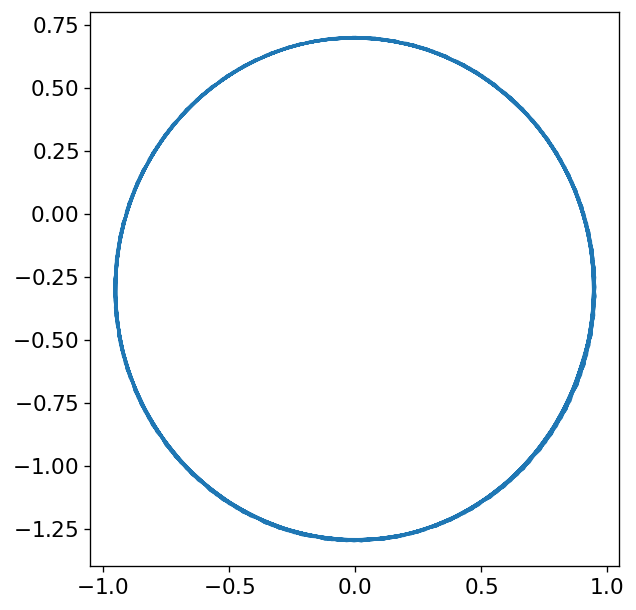

In [21]:
fig, ax = plt.subplots()

ax.plot(yvec[0,:], yvec[1,:])
ax.set_aspect("equal")

We see that this solution does not look great.  `solve_ivp` takes both a relative and absolute tolerance, and their defaults are `rtol=1.e-3`, `atol=1.e-6`.

They are combined into an error tolerance of $\mathtt{atol} + \mathtt{rtol} |y|$.

Let's make the tolerances tighter

In [17]:
sol = integrate.solve_ivp(rhs, (0, tmax), yvec0, method="RK45", rtol=1.e-6)

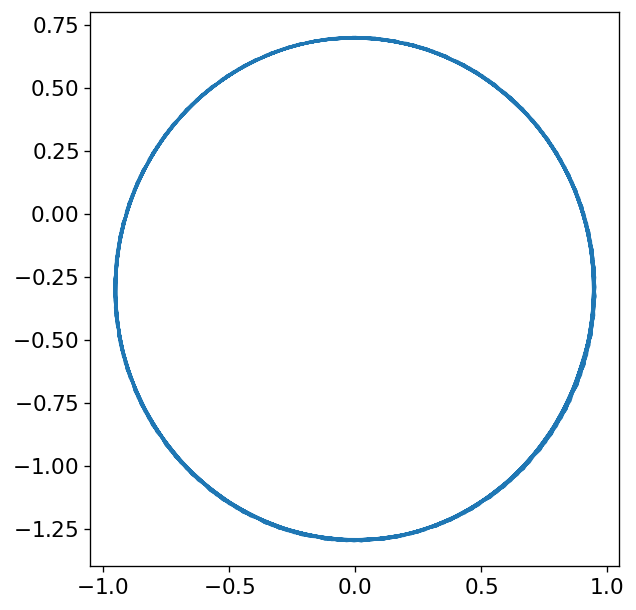

In [19]:
t = sol.t
yvec = sol.y

fig, ax = plt.subplots()

ax.plot(yvec[0,:], yvec[1,:])
ax.set_aspect("equal")

This looks much better.